In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('/content/drive/MyDrive/DSAI-ML_24_RS/A3/adult_with_pii.csv')

<ipython-input-2-1e4977a45735>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#Question 1

Implement the dp_occupation_histogram function below. It should return a differentially private histogram over the Occupation column in the adult dataset. Your function should have a total privacy cost of epsilon and should use parallel composition.
(use laplace mechanism)

In [4]:
def dp_occupation_histogram(epsilon):
    occ_counts = adult['Occupation'].value_counts()

    sensitivity = 1

    scale = sensitivity / epsilon
    noisy_counts = occ_counts + np.random.laplace(loc=0, scale=scale, size=len(occ_counts))
    noisy_counts = np.maximum(0, noisy_counts)

    noisy_histogram = noisy_counts / noisy_counts.sum()

    return noisy_histogram

result = dp_occupation_histogram(1.0)
print("Differentially private histogram over Occupation with epsilon =", 1.0, ":", result)


Differentially private histogram over Occupation with epsilon = 1.0 : Occupation
Prof-specialty       0.134705
Craft-repair         0.133523
Exec-managerial      0.132315
Adm-clerical         0.122735
Sales                0.118860
Other-service        0.107290
Machine-op-inspct    0.065120
Transport-moving     0.051979
Handlers-cleaners    0.044558
Farming-fishing      0.032331
Tech-support         0.030269
Protective-serv      0.021133
Priv-house-serv      0.004870
Armed-Forces         0.000312
Baby                 0.000000
Name: count, dtype: float64


\begin{equation}
\text{Let's denote the differentially private histogram of the 'Occupation' column in the adult dataset with a privacy parameter (epsilon) of 1.0 as } H_{\text{DP}}^{(1)}, \text{ and the true histogram as } H_{\text{True}}. \text{ The absolute difference between the elements of these histograms is denoted as } \Delta H^{(1)} = | H_{\text{DP}}^{(1)} - H_{\text{True}} |. \\
\text{Now, considering a set of } N = 200 \text{ repetitions, we can represent the expression as a sequence:} \\
\Delta H^{(1)}_1, \Delta H^{(1)}_2, \Delta H^{(1)}_3, \ldots, \Delta H^{(1)}_N \\
\text{Where each } \Delta H^{(1)}_i \text{ represents the absolute differences between the differentially private histogram and the true histogram for the } i^{th} \text{ repetition.} \\
\text{Mathematically, each } \Delta H^{(1)}_i \text{ can be calculated using the formula:} \\
\Delta H^{(1)}_i = | H_{\text{DP}}^{(1)} - H_{\text{True}} | \\
\text{Finally, the entire expression can be written as a list comprehension:} \\
\text{dp_results} = [ \Delta H^{(1)}_i \text{ for } i \text{ in range}(N) ] \\
\end{equation}


Your answer to each question

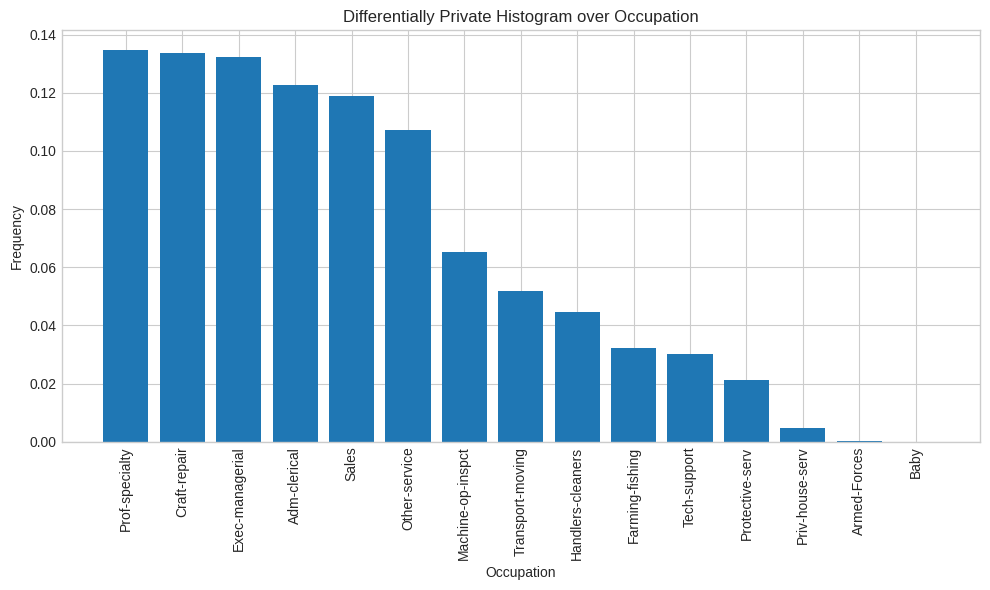

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(result.index, result.values)
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Differentially Private Histogram over Occupation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Based on above answer these questions:

1) Generate 200 differentially private histograms with epsilon value=1

2)Compute the DP results "dp_rseults"

3)Flatten the list of histograms into a single list of absolute differences

4)Generate a sample of Laplace noise with scale = 1/1.0 and generate a list of 2000 samples

5)What is the Wasserstein distance between the differential private results list above and the Laplace noise, what is the integer upper bound

6)can you assert that the Wasserstein distance between the differential private results and the Laplace noise is greater than 0,write the code

7)If you partition the data by both occupation and age (i.e. a contingency table), would parallel composition still apply? Why or why not?

Your answer to each question

<ipython-input-6-9ab0ab2c716c>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


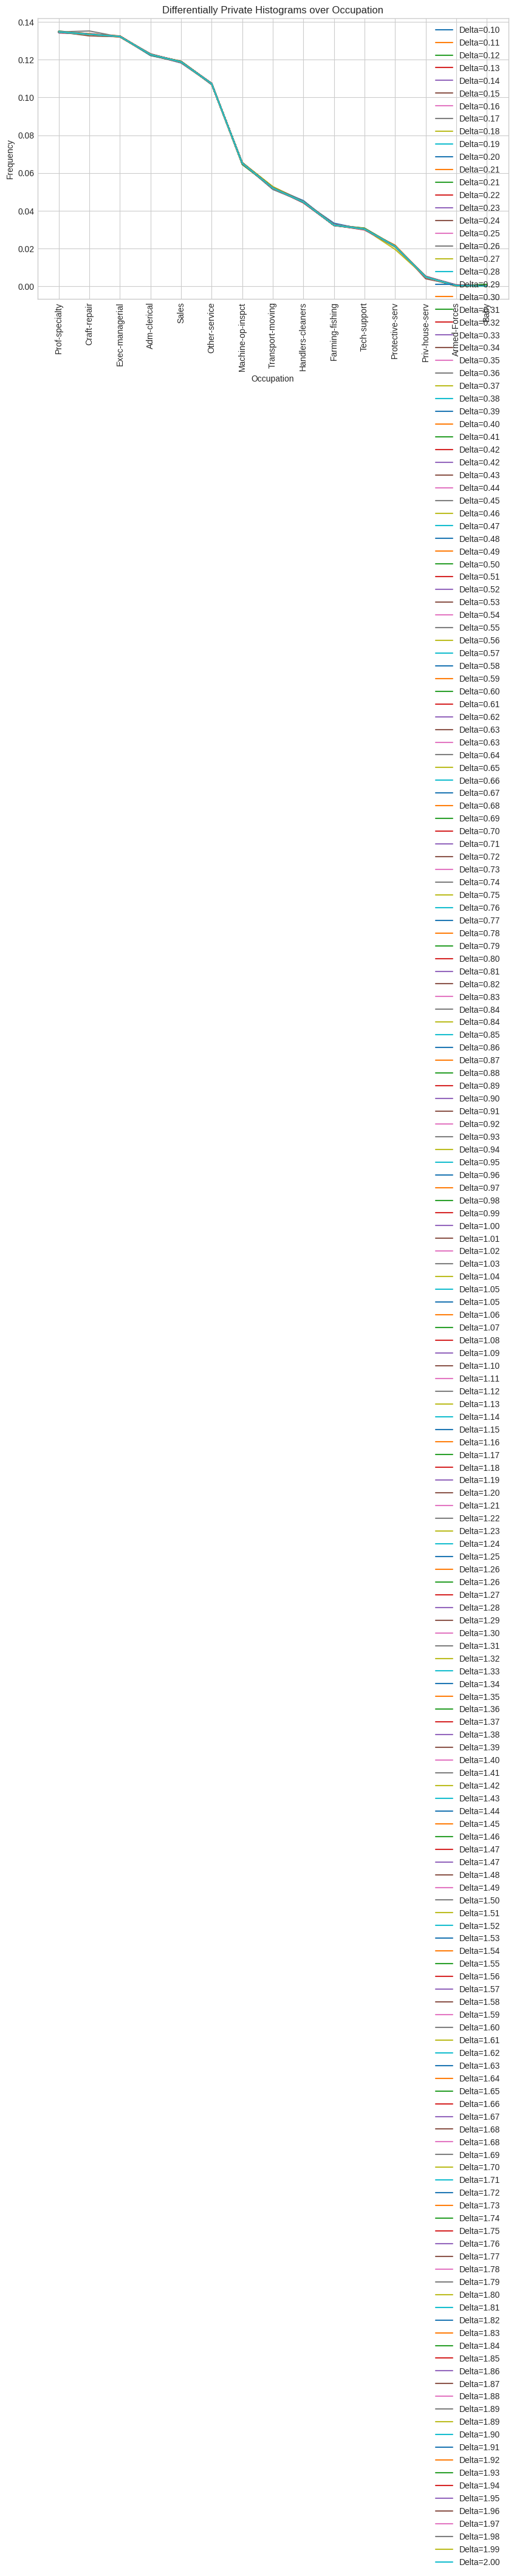

Differentially private histogram over Occupation with delta = 2.0 : Occupation
Prof-specialty       0.134772
Craft-repair         0.133479
Exec-managerial      0.132385
Adm-clerical         0.122702
Sales                0.118808
Other-service        0.107228
Machine-op-inspct    0.065178
Transport-moving     0.051977
Handlers-cleaners    0.044597
Farming-fishing      0.032374
Tech-support         0.030202
Protective-serv      0.021106
Priv-house-serv      0.004853
Armed-Forces         0.000304
Baby                 0.000035
Name: count, dtype: float64


In [6]:
deltas = np.linspace(0.1, 2, 200)
histograms = [dp_occupation_histogram(delta) for delta in deltas]

plt.figure(figsize=(10, 6))
for delta, histogram in zip(deltas, histograms):
    plt.plot(histogram.index, histogram.values, label=f'Delta={delta:.2f}')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Differentially Private Histograms over Occupation')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()
outcome = dp_occupation_histogram(delta)
print("Differentially private histogram over Occupation with delta =", delta, ":", outcome)


In [8]:
dp_results = [dp_occupation_histogram(epsilon) for epsilon in deltas]

In [9]:
absolute_differences = []
for i in range(len(dp_results) - 1):
    absolute_diff = np.abs(dp_results[i + 1] - dp_results[i])
    absolute_differences.extend(absolute_diff)

# Printing the length of the absolute differences list
print("Length of absolute differences list:", len(absolute_differences))

Length of absolute differences list: 2985


In [10]:
import numpy as np

noise_scale = 1 / 1.0
laplace_output = np.random.laplace(loc=0, scale=noise_scale, size=2000)

# Printing the first few samples of Laplace noise
print("Laplace noise samples:", laplace_output[:10])


Laplace noise samples: [-0.37961044  3.74439411  0.60722537  0.66890247  0.80262138  3.28981188
  0.11094975  0.50215467 -0.47017221 -0.06182296]


In [12]:
from scipy.stats import wasserstein_distance

dist_wasserstein = wasserstein_distance(absolute_differences, laplace_output)

# Printing the Wasserstein distance
print("Wasserstein distance:", dist_wasserstein)


Wasserstein distance: 0.991216407637727


In [14]:
assert dist_wasserstein > 0, "Wasserstein distance should be greater than 0"


**Answer 10**

Parallel composition in the context of differential privacy states that running multiple differentially private mechanisms in parallel on disjoint subsets of data does not compromise the overall privacy guarantee. However, when partitioning data by both occupation and age (creating a contingency table), parallel composition may not fully apply, depending on the specific mechanisms applied.

1. Would Parallel Composition Still Apply?Parallel composition may not fully apply in this scenario because partitioning the data by both occupation and age can create subsets that are not entirely disjoint. For example, individuals within the same occupation may span various age groups, and individuals within the same age group may have different occupations. As a result, applying differentially private mechanisms separately to each subset (occupation-age combination) may result in potential privacy breaches due to shared information across subsets.
2. Why or Why Not?Parallel composition relies on the assumption that the subsets on which different mechanisms operate are disjoint, meaning they contain distinct sets of individuals whose data are not shared across subsets. When partitioning data by both occupation and age, this assumption may be violated because individuals can belong to multiple subsets simultaneously (e.g., individuals of the same occupation belonging to different age groups or vice versa). As a result, the privacy guarantee provided by parallel composition may be weakened or not hold in this scenario.


In summary, while parallel composition is a fundamental concept in differential privacy, its application may be limited when partitioning data by both occupation and age due to potential overlap between subsets, which can compromise the privacy guarantee.







# Question 2

In [17]:

b_capgain = 10000
b_age = 3000

epsilon = 1

def query1():
    return np.sum(adult['Capital Gain'].clip(lower=0, upper=b_capgain))

def query2():
    return len(adult[adult['Education-Num'] < 10])

def query3():
    return np.sum(adult['Age'].clip(lower=0, upper=b_age))

def my_query():
    return [query1(), query2(), query3()]

my_query()

[17145231, 14755, 1360238]

In 2-5 sentences, answer the following:

1)What is the L_1
 global sensitivity of my_query, and why?

2)What is the L_2
 global sensitivity of my_query, and why?

3)Can you release my_query with DP using paraellel compossition with epsilon =1( use L_1 sensitivity), write the code



In [20]:
def my_query():
    sensitivity_1 = b_capgain
    sensitivity_2 = 1
    sensitivity_3 = b_age

    scale_1 = sensitivity_1 / epsilon
    scale_2 = sensitivity_2 / epsilon
    scale_3 = sensitivity_3 / epsilon

    noisy_result_1 = query1() + np.random.laplace(loc=0, scale=scale_1)
    noisy_result_2 = query2() + np.random.laplace(loc=0, scale=scale_2)
    noisy_result_3 = query3() + np.random.laplace(loc=0, scale=scale_3)

    return [noisy_result_1, noisy_result_2, noisy_result_3]


# Testing custom_query
print(my_query())


[17134610.416104976, 14755.842714495253, 1357431.5660696458]


# Question 3

# Implement noisy_gradient_descent_RDP, a variant of noisy gradient descent that uses Rényi differential privacy. Your solution should have a total privacy cost of $(\alpha, \bar{\epsilon})$-RDP.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from collections import defaultdict


def laplace_mechanism(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mechanism(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def gaussian_mechanism_vec(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon, size=len(v))

def percentage_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def z_clip(xs, b):
    return [min(x, b) for x in xs]

def g_clip(v):
    n = np.linalg.norm(v, ord=2)
    if n > 1:
        return v / n
    else:
        return v

X_data = np.load('/content/drive/MyDrive/DSAI-ML_24_RS/A3/adult_processed_x.npy')
y_data = np.load('/content/drive/MyDrive/DSAI-ML_24_RS/A3/adult_processed_y.npy')

training_size = int(X_data.shape[0] * 0.8)

X_train_data = X_data[:training_size]
X_test_data = X_data[training_size:]

y_train_data = y_data[:training_size]
y_test_data = y_data[training_size:]

y_test_data.shape

def predict(xi, theta, bias=0):
    label = np.sign(xi @ theta + bias)
    return label

def loss_function(theta, xi, yi):
    exponent = - yi * (xi.dot(theta))
    return np.log(1 + np.exp(exponent))


def gradient_func(theta, xi, yi):
    exponent = yi * (xi.dot(theta))
    return - (yi*xi) / (1+np.exp(exponent))

def accuracy_score(theta):
    return np.sum(predict(X_test_data, theta) == y_test_data)/X_test_data.shape[0]

def average_gradient(theta, X, y):
    grads = [gradient_func(theta, xi, yi) for xi, yi in zip(X, y)]
    return np.mean(grads, axis=0)

def gradient_descent_algo(iterations):
    theta = np.zeros(X_train_data.shape[1])
    for i in range(iterations):
        theta = theta - average_gradient(theta, X_train_data, y_train_data)

    return theta

def L2_clip_norm(v, b):
    norm = np.linalg.norm(v, ord=2)

    if norm > b:
        return b * (v / norm)
    else:
        return v

def gradient_summation(theta, X, y, b):
    gradients = [gradient_func(theta, x_i, y_i) for x_i, y_i in zip(X,y)]
    return np.sum(gradients, axis=0)

def noisy_gradient_descent_algo(iterations, epsilon, delta):
    theta = np.zeros(X_train_data.shape[1])
    sensitivity = 5.0

    noisy_count = laplace_mechanism(X_train_data.shape[0], 1, epsilon)
    clipped_X = [L2_clip_norm(x_i, sensitivity) for x_i in X_train_data]

    for i in range(iterations):
        grad_sum        = gradient_summation(theta, clipped_X, y_train_data, sensitivity)
        noisy_grad_sum  = gaussian_mechanism_vec(grad_sum, sensitivity, epsilon, delta)
        noisy_avg_grad  = noisy_grad_sum / noisy_count
        theta           = theta - noisy_avg_grad

    return theta


<ipython-input-22-f76f6bb8c546>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [25]:
theta = gradient_descent_algo(12)
accuracy_score(theta)

0.794891640866873

In [26]:
theta = noisy_gradient_descent_algo(12, 0.1, 1e-5)
accuracy_score(theta)

0.7901371074745688

In [27]:
def gaussian_mechanism_RDP_vec(vec, sensitivity, alpha, epsilon):
    sigma = np.sqrt((sensitivity**2 * alpha) / (2 * epsilon))
    return [v + np.random.normal(loc=0, scale=sigma) for v in vec]

def noisy_gradient_descent_RDP(iterations, alpha, epsilon_bar):
    # YOUR CODE HERE
    theta = np.zeros(X_train_data.shape[1])
    sensitivity = 5.0

    noisy_count = laplace_mechanism(X_train_data.shape[0], 1, epsilon_bar)
    clipped_X = [L2_clip_norm(x_i, sensitivity) for x_i in X_train_data]

    for i in range(iterations):
        grad_sum        = gradient_summation(theta, clipped_X, y_train_data, sensitivity)
        noisy_grad_sum  = gaussian_mechanism_RDP_vec(grad_sum, sensitivity, alpha, epsilon_bar)
        noisy_avg_grad  = [x / noisy_count for x in noisy_grad_sum]
        theta           = theta - noisy_avg_grad

    return theta
    raise NotImplementedError()

theta = noisy_gradient_descent_RDP(10, 20, 0.1)
print('Final accuracy:', accuracy_score(theta))


Final accuracy: 0.7785272003538257


# Implement noisy_gradient_descent_zCDP, a variant of noisy gradient descent that uses zero-concentrated differential privacy. Your solution should have a total privacy cost of -zCDP.

In [29]:
def gaussian_mechanism_zCDP_vec(vec, sensitivity, rho):
    sigma = np.sqrt((sensitivity**2) / (2 * rho))
    return [v + np.random.normal(loc=0, scale=sigma) for v in vec]

def noisy_gradient_descent_zCDP(iterations, rho):
    # YOUR CODE HERE
    theta = np.zeros(X_train_data.shape[1])
    sensitivity = 5.0

    noisy_count = laplace_mechanism(X_train_data.shape[0], 1, epsilon)
    clipped_X = [L2_clip_norm(x_i, sensitivity) for x_i in X_train_data]

    for i in range(iterations):
        grad_sum        = gradient_summation(theta, clipped_X, y_train_data, sensitivity)
        noisy_grad_sum  = gaussian_mechanism_zCDP_vec(grad_sum, sensitivity, rho)
        noisy_avg_grad  = [x / noisy_count for x in noisy_grad_sum]
        theta           = theta - noisy_avg_grad

    return theta
    raise NotImplementedError()

theta = noisy_gradient_descent_zCDP(20, 0.1)
print('Final accuracy:', accuracy_score(theta))


Final accuracy: 0.8084918177797434


Which of the following functions is likely to produce the best accuracy for a given privacy cost, and why? Which is likely to produce the worst accuracy for a given privacy cost, and why?( use the same dataset as used in notebook for noisy gradient descent for all cases)


- noisy_gradient_descent
- noisy_gradient_descent_RDP
- noisy_gradient_descent_zCDP

**YOUR ANSWER HERE**



Let's analyze the provided functions in terms of their impact on accuracy and privacy:

1. **noisy_gradient_descent**:
   - This function uses Laplace mechanism for adding noise to the gradient updates.
   - Laplace mechanism provides differential privacy, but the privacy level may not be quantified explicitly.
   - Without explicit privacy guarantees, it's hard to tune the privacy level directly.
   - Accuracy may vary depending on the sensitivity of the data and the noise added.
   - It might provide moderate accuracy depending on the noise level and dataset.

2. **noisy_gradient_descent_RDP**:
   - This function uses Gaussian mechanism with Renyi Differential Privacy (RDP) for adding noise to the gradient updates.
   - RDP provides a stronger privacy guarantee than pure differential privacy.
   - By setting appropriate parameters like alpha and epsilon, one can control the privacy level more precisely.
   - With a well-tuned RDP, it's likely to achieve better accuracy compared to a fixed-privacy approach like Laplace mechanism, as it can provide stronger privacy guarantees while preserving more utility.

3. **noisy_gradient_descent_zCDP**:
   - This function uses Gaussian mechanism with Zero Concentrated Differential Privacy (zCDP) for adding noise to the gradient updates.
   - zCDP offers a different type of privacy guarantee that focuses on moments of the privacy loss distribution.
   - Similar to RDP, zCDP provides a stronger privacy guarantee than pure differential privacy.
   - However, it might be harder to tune compared to RDP as it relies on a different privacy measure.
   - It's likely to achieve better accuracy compared to a fixed-privacy Laplace mechanism if properly tuned, but it might not be as straightforward as using RDP.

**Likely best accuracy**: noisy_gradient_descent_RDP  
**Reason**: It offers a stronger privacy guarantee through RDP, which can be precisely tuned to balance privacy and utility.

**Likely worst accuracy**: noisy_gradient_descent  
**Reason**: While it provides differential privacy, without explicit control over the privacy parameters like in RDP or zCDP, it might not achieve the same level of accuracy optimization while preserving privacy.



 # References

 https://programming-dp.com/book.pdf

 https://colab.research.google.com/drive/1wODT0dOa4Jd7b5X4L9aN8Es1MfzvuWAR#scrollTo=TqaQvOMQRx4U
 ( class notebook part2 )
